# Анализ оттока клиентов банка

В региональном банке «Метанпром», располагающемся в Ярославле и областных городах (Ростов Великий и Рыбинск), наблюдается отток клиентов. Маркетинговому отделу банка необходимо выяснить, какие сегменты клиентов склонны к оттоку, чтобы в дальнейшем адаптировать рекламные кампании и продуктовые предложения для удержания выделенных клиентов.


**Задача:** проанализировать клиентов регионального банка и выделите сегменты клиентов, которые склонны уходить из банка.



**Описание данных.**
Датасет `bank_scrooge.csv` с данными о клиентах:
- `USERID` — идентификатор пользователя;
- `score` — баллы кредитного скоринга;
- `city` — город;
- `gender` — пол;
- `age` — возраст;
- `equity`  — количество баллов собственности;
- `balance` — баланс на счёте;
- `products` — количество продуктов, которыми пользуется клиент;
- `credit_card` — есть ли кредитная карта;
- `last_activity` — активный клиент;
- `EST_SALARY` — заработная плата клиента;
- `churn` — ушёл или нет.




**План исследования:**

1. Предобработка данных:
    * загрузка данных и библиотек;
    * общее знакомство с данными;
    * исследование типов данных;
    * исследование данных на пропуски;
    * исследование данных на дубликаты;
    * корректировка названий колонок;
    * заполнение пропусков в случае необходимости.
    
    
2. Исследовательский анализ данных:
    * изучение значений переменных в столбцах, выявление аномалий;
    * построение графиков, отражающих распределение ушедших и оставшихся клиентов по имеющимся в данных параметрам;
    * выявление корреляции между оттоком и другими параметрами;
    * определение сегментов клиентов, склонных к уходу, на основе выявленных в предыдущих пунктах особенностей.
    
    
3. Проверка статистических гипотез:
    * проверка гипотезы о различии дохода между ушедшими и оставшимися клиентами;
    * проверка гипотезы о различии в возрасте между ушедшими и оставшимися клиентами;
    * проверка гипотезы о различии в количестве используемых банковских продуктов между между ушедшими и оставшимися клиентами;
    * проверка гипотезы о различии в активности между ушедшими и оставшимися клиентами.
    
    
4. Выводы и рекомендации.


## Предобработка данных.

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Импортируем библиотеки.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import phik
from phik.report import plot_correlation_matrix
from phik import report
from scipy import stats as st

In [3]:
# Путь к файлу с данными.

path = "..."

In [4]:
# Сохраняем файл в переменную.

data = pd.read_csv(path)

In [5]:
# Выводим первые 10 строк.

data.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


In [6]:
# Выводим общую информацию о датасете.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


В имеющемся датасете представлено 10000 наблюдений и 12 параметров/колонок. Необходимости менять тип данных нет. Судя по первым строкам, колонка `score` имеет целочисленные значения , но представленна типом `float`. Так же значения в колонке `age` имеют тип `float`, хотя эта характеристика определяется целым числом. Между тем, для дальнейшего анализа это не проблематично.


In [7]:
# Определяем количество пропущенных значений в столбцах.

data.isna().sum()

USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

In [8]:
# Определяем долю пропусков в столбце balance от общего количества наблюдений.

balance_nan_share = round((data['balance'].isna().sum()/len(data))*100, 2)
print('Доля пропусков в столбце balance:', balance_nan_share, '%')

Доля пропусков в столбце balance: 22.95 %


In [9]:
# Определяем долю пропусков в столбце age от общего количества наблюдений.

age_nan_share = round((data['age'].isna().sum()/len(data))*100, 2)
print('Доля пропусков в столбце age:', age_nan_share, '%')

Доля пропусков в столбце age: 0.26 %


Пропущенные значения имеются в 2 колонках: `age` - 26 пропусков, `balance` - 2295 пропусков. Предположительно, это может быть связано с техническими сбоями при сохранении, выгрузке или копировании данных. Доля пропусков в столбце `balance` составляет почти 23%. Удаление пропущенных значений в данном столбце приведёт к критической потере информации.

In [10]:
# Проверяем данные на наличие дубликатов.

data.duplicated().sum()

0

In [11]:
# Названия столбцов приводим к нижнему регистру.
# Добавим нижнее подчёркивание в название столбца userid.

data.columns = data.columns.str.lower()
data = data.rename(columns = {'userid':'user_id'})

In [12]:
# Проверим результат преобразований.

data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


### Выводы по разделу.

При первичном знакомстве с данными были сделаны следующие наблюдения:
* всего в датасете представлено 10000 наблюдений и 12 колонок, хранящих информацию о различных характеристиках клиентов банка;
* пропущенные значения имеются в двух колонках `age`(26 пропусков) и `balance`(2295 пропусков). Их наличие может быть связано с техническими сбоями при сохранении, выгрузке или копировании данных. Пропуски были оставлены, чтобы не терять объём исследуемых данных;
* дубликатов в датасете не наблюдается;
* названия колонок приведены к единому стилю.


## Исследовательский анализ данных.

### Изучение значений переменных.

In [13]:
# Посмотрим на значения в столбце city.

data['city'].value_counts()

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

В датасете представлена информация о клиентах, проживающих в трёх города: Ярославле, Рыбинске и Ростове. Больше всего клиентов находится в Ярославле.

In [14]:
# Посмотрим на распределение мужчин и женщин в датасете.

data['gender'].value_counts()

М    5005
Ж    4995
Name: gender, dtype: int64

Оба пола представлены в данных примерно в одинаковых пропорциях.

In [15]:
# Посмотрим, сколько клиентов имеют и не имеют кредитные карты.

data['credit_card'].value_counts()

1    6804
0    3196
Name: credit_card, dtype: int64

Клиентов с кредитными картами примерно в два раза больше.

In [16]:
# Посмотрим на рспределение оценок собственности.

data['equity'].value_counts()

0    2592
5    1918
4    1850
3    1543
2    1052
1     774
6     161
7      80
8      17
9      13
Name: equity, dtype: int64

Преобладают клиенты с оценкой недвижимости 0, т.е. её не имеющие.

In [17]:
# Посмотрим на количество используемых продуктов.

data['products'].value_counts()

2    5126
1    3341
3    1039
4     474
5      19
0       1
Name: products, dtype: int64

Преобладают клиенты, использующие 2 продукта банка.

In [18]:
data.query('products == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


В данных имеется один клиент, не имеющий ни одного банковского продукта - женщина 79 лет. Возможно, она обратилась в банк с целью получения кредита, но ей было отказано, соответственно, получение продукта не состоялось. Либо она передумала приобретать какие-либо банковские продукты, хотя информация уже попала в базу данных. Возможны и другие причины. Данные об этом клиенте можно удалить, на дальнейший анализ это не окажет влияния.

In [19]:
data = data.query('products > 0')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9999 non-null   int64  
 1   score          9999 non-null   float64
 2   city           9999 non-null   object 
 3   gender         9999 non-null   object 
 4   age            9973 non-null   float64
 5   equity         9999 non-null   int64  
 6   balance        7705 non-null   float64
 7   products       9999 non-null   int64  
 8   credit_card    9999 non-null   int64  
 9   last_activity  9999 non-null   int64  
 10  est_salary     9999 non-null   float64
 11  churn          9999 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1015.5+ KB


In [21]:
# Исследуем данные об активности.
data['last_activity'].value_counts()

1    5235
0    4764
Name: last_activity, dtype: int64

Количество активных клиентов несколько выше.

In [22]:
# Посмотрим, сколько клиентов осталось, а сколько ушло.

data['churn'].value_counts()

0    8180
1    1819
Name: churn, dtype: int64

In [23]:
# Посмотрим на процент оттока.

round(data['churn'].value_counts()[1]/data.shape[0]*100,1)

18.2

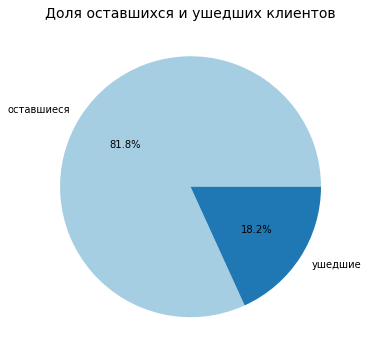

In [24]:
# Визуализация оттока.

pie, ax = plt.subplots(figsize=[10,6])
labels = ['оставшиеся', 'ушедшие']
colors = sns.color_palette('Paired')[0:2]
plt.pie(data['churn'].value_counts(), labels = labels, colors = colors, autopct='%.1f%%')
plt.title('Доля оставшихся и ушедших клиентов', fontsize=14);
plt.show()

Несмотря на то, что количество лояльных клиентов выше, доля оттока весьма внушительная - 18.2%

In [25]:
# Изучим некоторые характеристики значений в числовых столбцах.

data[['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']].describe()

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9999.000000,9973.000000,9999.000000,7.705000e+03,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000
mean,848.688069,42.730773,2.627563,8.277943e+05,1.870287,0.680468,0.523552,1.478792e+05,0.181918
std,65.441981,12.175166,1.980931,1.980614e+06,0.792466,0.466319,0.499470,1.393901e+05,0.385796
min,642.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525212e+04,0.000000
50%,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196615e+05,0.000000
75%,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745011e+05,0.000000
max,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


* В колонке `age` наблюдаются значения от 18 до 86, что вписывается в логические рамки, аномалий не наблюдается.
* Параметры `churn`, `equity`, `products`, `credit_card`, `last_activity`, `score` - характеристики категориальные, выраженные числами.
* Широкий разброс данных наблюдается в колонках `balance` и `est_salary`. Построим диаграммы размаха значений для детального изучения.

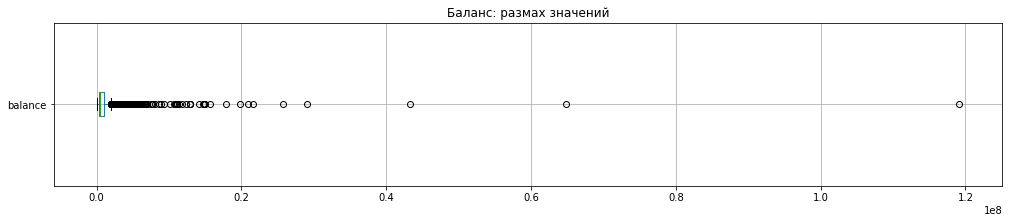

In [59]:
# Посмотрим на распределение значений в столбце 'balance'

fig, ax = plt.subplots(figsize = (17,3))
ax = data[['balance']].boxplot(vert = False, ax =ax)
ax.set_title('Баланс: размах значений');

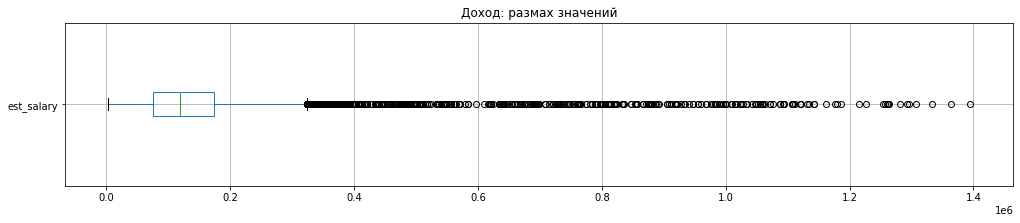

In [60]:
# Посмотрим на распределение значений в столбце 'est_salary'

fig, ax = plt.subplots(figsize = (17,3))
ax = data[['est_salary']].boxplot(vert = False, ax =ax)
ax.set_title('Доход: размах значений');

В столбце `balance` есть значения, которые заметно выше среднего показателя. Их значительно меньше основной массы, из-за этого график сильно смещён влево. В столбце баланс также имеются значения значительно выше среднего. В целом, наличие клиентов с высоким доходом и балансом не является аномалией, такие люди встречаются. Удалять подобных клиентов не будем.

### Распределение ушедших и оставшихся клиентов по параметрам.

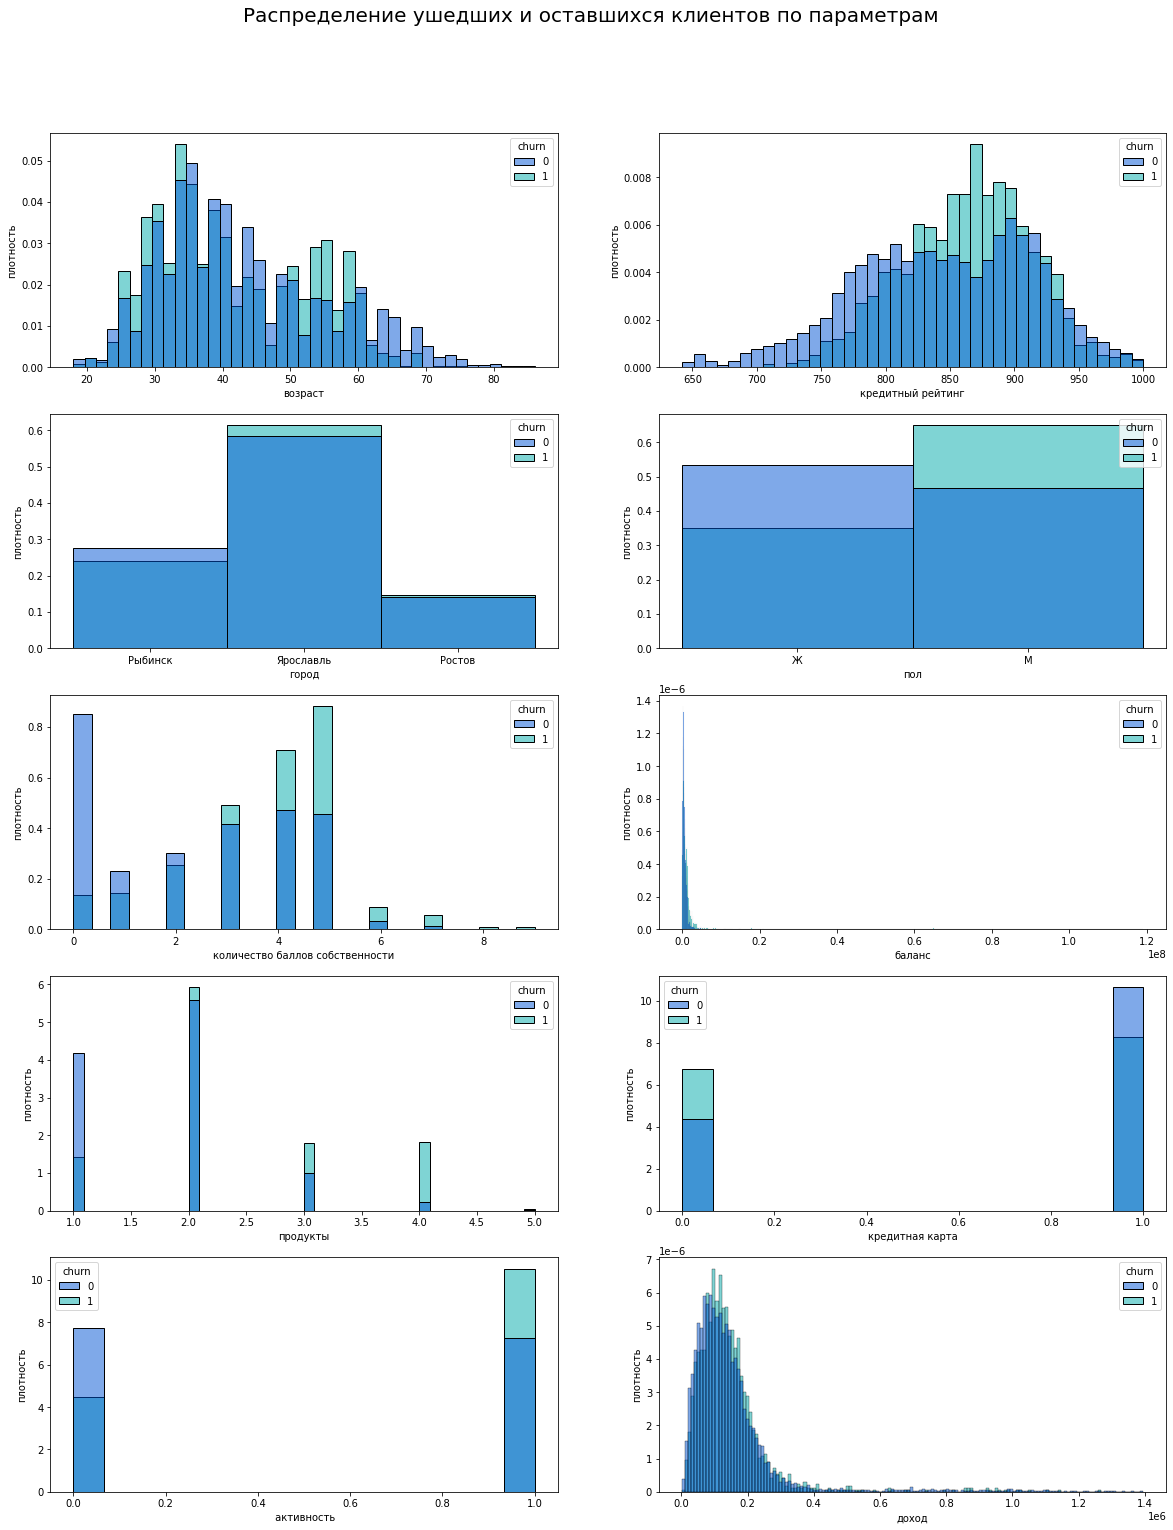

In [28]:
# Построим на распределение отточных и оставшихся клиентов по параметрам.

import warnings
warnings.filterwarnings("ignore")

fig = plt.figure(figsize=(20, 25))
plt.suptitle('Распределение ушедших и оставшихся клиентов по параметрам', fontsize=20, y=0.95)

columns = ['age', 'score', 'city', 'gender', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary']
labels = ['возраст', 'кредитный рейтинг', 'город', 'пол', 'количество баллов собственности', 'баланс', 'продукты', 'кредитная карта', ' активность', 'доход']
for i, c in enumerate (columns):
    ax = plt.subplot(5, 2, i+1)
    graph = sns.histplot(data = data, hue = 'churn', x = c, stat = 'density', common_norm = False, palette = 'winter')
    graph.set(xlabel =labels[i], ylabel = 'плотность')
fig.show()


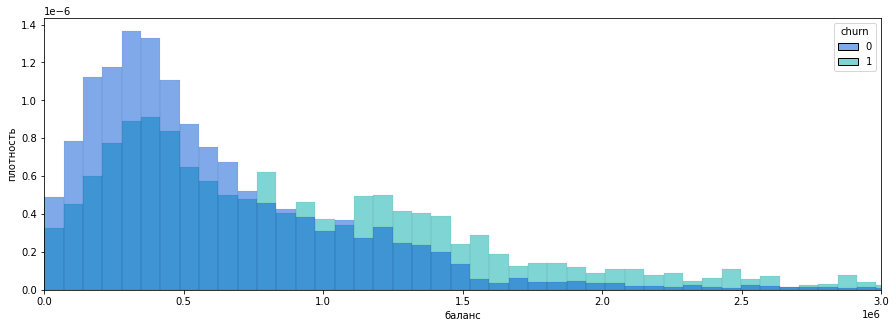

In [29]:
# Рассмотрим ближе график баланса.

fig = plt.figure(figsize=(15, 5))
ax = sns.histplot(data = data, hue = 'churn', x = 'balance', stat = 'density', common_norm = False, palette = 'winter')
ax.set(xlabel ='баланс', ylabel = 'плотность')
plt.xlim(0, 3000000);

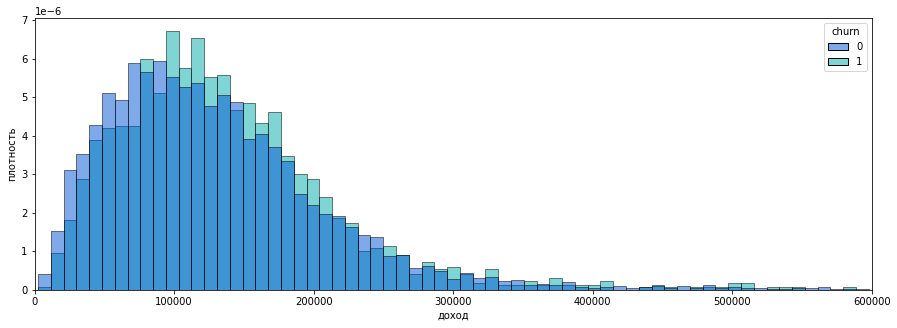

In [30]:
# Рассмотрим ближе график дохода.

fig = plt.figure(figsize=(15, 5))
ax = sns.histplot(data = data, hue = 'churn', x = 'est_salary', stat = 'density', common_norm = False, palette = 'winter')
ax.set(xlabel ='доход', ylabel = 'плотность')
plt.xlim(0, 600000);

На графиках распределения ушедших и оставшихся клиентов по имеющимся характеристикам наблюдаются нижеследующие тенденции.
Чаще уходят клиенты:

* в возрасте от 25 до 35 лет и от 50 до 60 лет;
* с кредитным рейтингом от 830 до 900;
* из Ярославля;
* мужчины;
* с балансом средств более 800000;
* с количеством используемых продуктов от 2;
* с количеством баллов собственности от 3;
* не имеющие кредитной карты;
* активные;
* с доходом более 100000.

### Исследование корреляции между параметрами.

In [31]:
# Строим корреляционную матрицу.

interval_cols = ['score', 'age', 'equity','balance', 'products','est_salary']

phik_overview = (data[['score', 
                     'city',
                     'age',
                     'gender',
                     'equity', 
                     'balance', 
                     'products', 
                     'credit_card', 
                     'last_activity', 
                     'est_salary', 
                     'churn']]
                 .phik_matrix(interval_cols=interval_cols)
                )
phik_overview.round(2)

,score,city,age,gender,equity,balance,products,credit_card,last_activity,est_salary,churn
score,1.00,0.09,0.03,0.07,0.53,0.17,0.42,0.21,0.05,0.40,0.23
city,0.09,1.00,0.09,0.01,0.06,0.04,0.12,0.07,0.03,0.17,0.02
age,0.03,0.09,1.00,0.29,0.05,0.02,0.14,0.16,0.09,0.36,0.19
gender,0.07,0.01,0.29,1.00,0.06,0.05,0.07,0.20,0.01,0.14,0.22
equity,0.53,0.06,0.05,0.06,1.00,0.00,0.58,0.22,0.05,0.29,0.35
balance,0.17,0.04,0.02,0.05,0.00,1.00,0.00,0.00,0.00,0.37,0.02
products,0.42,0.12,0.14,0.07,0.58,0.00,1.00,0.27,0.11,0.22,0.26
credit_card,0.21,0.07,0.16,0.20,0.22,0.00,0.27,1.00,0.05,0.04,0.20
last_activity,0.05,0.03,0.09,0.01,0.05,0.00,0.11,0.05,1.00,0.05,0.26
est_salary,0.40,0.17,0.36,0.14,0.29,0.37,0.22,0.04,0.05,1.00,0.05


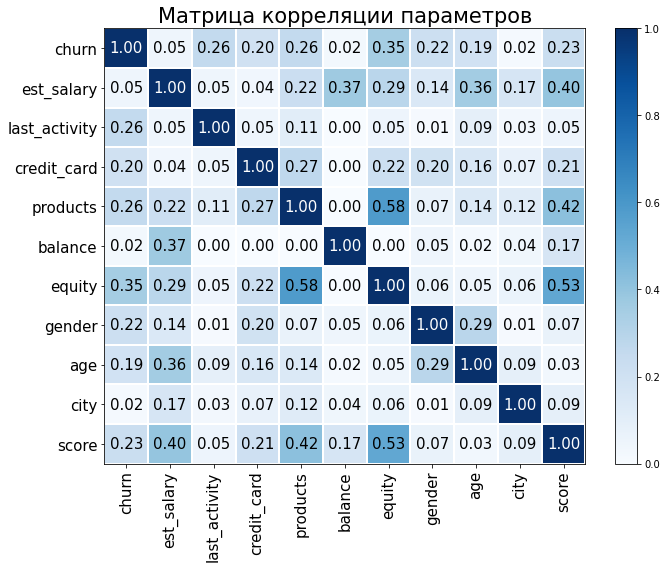

In [32]:
# Строим тепловую карту на основе корреляционной матрицы.

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Blues", 
                        title=r"Матрица корреляции параметров", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()

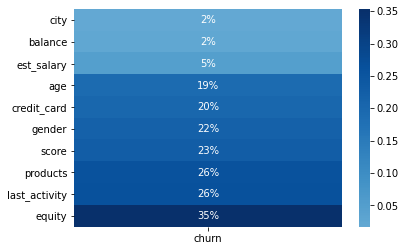

In [33]:
# Выделим оттдельно информацию о коррелиции оттока с другими параметрами.

sns.heatmap(
    phik_overview.loc[:,['churn']].drop('churn').sort_values('churn'),
    annot=True, 
    fmt = '.0%', 
    cmap='Blues', 
    center=0
);

На карте видно, что наиболее сильная корреляция оттока наблюдается с параметрами `equity`(35%), `products` (26%), `last_activity` (26%), `score`(23%). 

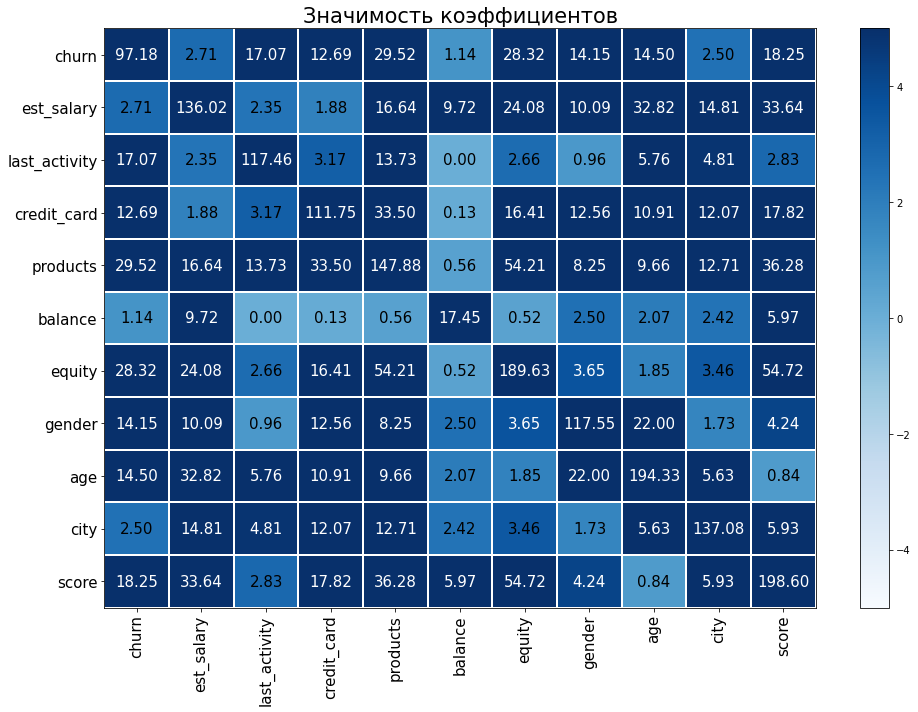

In [34]:
# Посмотрим на значимость коэффициентов.

significance_overview = (data[['score', 
                     'city',
                     'age',
                     'gender',
                     'equity', 
                     'balance', 
                     'products', 
                     'credit_card', 
                     'last_activity', 
                     'est_salary', 
                     'churn']]
                         .significance_matrix(interval_cols=interval_cols)
                        )
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, color_map="Blues", title="Значимость коэффициентов", 
                        usetex=False, fontsize_factor=1.5, figsize=(14, 10))
plt.tight_layout()

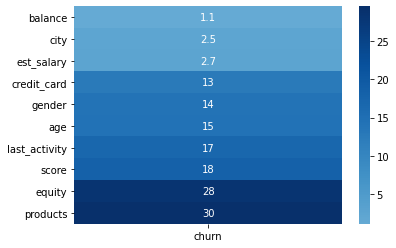

In [35]:
# Выделим оттдельно информацию о значимости коэффициентов корреляции для оттока.

sns.heatmap(significance_overview.loc[:,['churn']].drop('churn').sort_values('churn'),
            annot=True, cmap='Blues', center=0);

По значимости коэффициенты корреляции выстроены практически в том же порядке, при этом наиболее значимыми являются  - `products`, `equity`, `score`, `last_activity`. Преположительно, именно эти параметры будут чаще всего встречаться далее при выделении сегментов клиентов, склонных к оттоку.

### Формирование сегментов склонных к оттоку.

#### Формирование сегментов, склонных к оттоку, по 2 параметрам.


Для определения сегментов клиентов, склонных к оттоку создадим функцию, которая будет попарно группировать характеристики наиболее отточных клиентов, выделенные ранне(т.е., например, возраст более 25 и менее 35 + доход более 100000, возраст более 25 и менее 35 + кредитный рейтинг от 830 до 900, и т.д.). Отдельно создадим список выделенных параметров, по которым будет проходить функция. Это позволит при необходимости в дальнейшем добавить другие характеристики, а также, в нашем случае, два раза вывести функцию для двух разных возрастных диапазонов, склонных к уходу. Если доля оттока будет составлять более 30% и размер группы будет в диапазоне от 500 до 2000 человек, функция выведет характеристики данной группы, размер и долю оттока, которую она составляет.

In [36]:
# Создадим параметры, по которым будет проходить функция.
# Сначала возьмём возрастной диапазон от 50 до 60 лет.

parameters = ['products > 1',
              'equity > 2', 
              'balance > 800000', 
              '830 < score < 900', 
              'last_activity == 1', 
              'gender == "М"', 
              '50 < age < 60', 
              'credit_card == 0', 
              'est_salary > 100000', 
              'city == "Ярославль"']

In [37]:
def segments(parameters):
    
    dataframe = {'сегмент':[], 'размер':[], 'отток_%':[]}
    clients_segments = pd.DataFrame(dataframe)
    
    for i in range (len(parameters)):
        for j in range(i+1, len(parameters)):
            if round(
                (data.query(parameters[i] +' and ' + parameters[j])['churn'].value_counts()[1]
                 /data.query(parameters[i] +' and ' + parameters[j]).shape[0])*100,2
            )>30 and 500 <= data.query(parameters[i] +' and ' + parameters[j]).shape[0] <=2000:
                new_row = {'сегмент': parameters[i] +' and ' + parameters[j],
                           'размер': data.query(parameters[i] +' and ' + parameters[j]).shape[0],
                           'отток_%': round((data.query(parameters[i] +' and ' + parameters[j])['churn'].value_counts()[1]
                                           /data.query(parameters[i] +' and ' + parameters[j]).shape[0])*100,2)}
                clients_segments = clients_segments.append(new_row, ignore_index=True)
            else:
                pass
    display(clients_segments.sort_values('отток_%', ascending=False).reset_index(drop=True))

In [38]:
segments(parameters)

,сегмент,размер,отток_%
0,balance > 800000 and last_activity == 1,1321.0,48.68
1,"balance > 800000 and gender == ""М""",1285.0,45.68
2,balance > 800000 and credit_card == 0,1132.0,42.23
3,balance > 800000 and 830 < score < 900,1015.0,40.79
4,balance > 800000 and est_salary > 100000,1780.0,40.73
5,830 < score < 900 and last_activity == 1,1795.0,39.00
6,"balance > 800000 and city == ""Ярославль""",1522.0,38.83
7,830 < score < 900 and 50 < age < 60,507.0,37.87
8,equity > 2 and 50 < age < 60,819.0,37.85
9,50 < age < 60 and credit_card == 0,570.0,37.19


При группировке по двум характеристикам мы получаем довольно много сегментов. Наиболее существенные из них:

* активные клиенты с балансом более 800000 (размер: 1321, отток: 48.68%);
* мужчины с балансом более 800000 (размер: 1285, отток: 45.68%);
* клиенты без кредитной карты и балансом более 800000 (размер: 1132, отток: 42.23%);
* клиенты с кредитным рейтингом от 830 до 900 и балансом более 800000 (размер: 1015, отток: 40.79%);
* клиенты с доходом более 100000 и балансом более 800000 (размер: 1780, отток: 40.73%).

Некоторые сегменты включают возрастной параметр. Например:
* клиенты в возрасте от 50 до 60 лет и кредитным рейтингом от 830 до 900 (размер: 507, отток: 37.87%);
* мужчины в возрасте от 50 до 60 лет (размер: 620, отток: 35%);
* клиенты в возрасте от 50 до 60 лет с количеством продуктов от 2(размер: 1001, отток: 35.16%).



In [41]:
# Подставим другой возрастной диапазон, 25<age<35,
# и посмотрим, появятся ли новые сегменты, включающие этот параметр.

parameters = ['products > 1',
              'equity > 2', 
              'balance > 800000', 
              '830 < score < 900', 
              'last_activity == 1', 
              'gender == "М"', 
              '25 < age < 35', 
              'credit_card == 0', 
              'est_salary > 100000', 
              'city == "Ярославль"']

In [42]:
segments(parameters)

,сегмент,размер,отток_%
0,balance > 800000 and last_activity == 1,1321.0,48.68
1,"balance > 800000 and gender == ""М""",1285.0,45.68
2,balance > 800000 and credit_card == 0,1132.0,42.23
3,balance > 800000 and 830 < score < 900,1015.0,40.79
4,balance > 800000 and est_salary > 100000,1780.0,40.73
5,830 < score < 900 and last_activity == 1,1795.0,39.00
6,"balance > 800000 and city == ""Ярославль""",1522.0,38.83
7,25 < age < 35 and credit_card == 0,684.0,36.26
8,"gender == ""М"" and credit_card == 0",1305.0,35.02
9,last_activity == 1 and credit_card == 0,1751.0,35.01


При группировке с параметром "возраст от 25 до 35" топ-7 сегментов с самой высокой долей оттока осталась той же, однако таблица также пополнилась новыми сегментами, включающими новый параметр. Например:
* клиенты в возрасте от 25 до 35 лет без кредитной карты (размер: 684, отток: 36.26%);
* клиенты в возрасте от 25 до 35 лет с количеством баллов собственности от 3 (размер: 1426, отток: 33.24%);
* активные клиенты в возрасте от 25 до 35 лет (размер: 1388, отток: 32.20%);
* клиенты в возрасте от 25 до 35 лет с кредитным рейтингм от 830 до 900 (размер: 935, отток: 31.02%).

#### Формирование сегментов, склонных к оттоку, по 3 параметрам.

In [43]:
# Создадим параметры, по которым будет проходить функция.
# Сначала возьмём возрастной диапазон от 50 до 60 лет.

parameters = ['products > 1',
              'equity > 2', 
              'balance > 800000', 
              '830 < score < 900', 
              'last_activity == 1', 
              'gender == "М"', 
              '50 < age < 60', 
              'credit_card == 0', 
              'est_salary > 100000', 
              'city == "Ярославль"']

In [44]:
# Попробуем укрупнить сегменты, группируя по три признака.
# Создадим функцию, группирующую три параметра.

def segments(parameters):
    
    dataframe = {'сегмент':[], 'размер':[],'отток_%':[]}
    clients_segments = pd.DataFrame(dataframe)
    
    for i in range (len(parameters)):
        for j in range(i+1, len(parameters)):
            for k in range(j+1, len(parameters)):
                
                if round(
                    (data.query(parameters[i] +' and ' + parameters[j] + ' and ' + parameters[k])['churn'].value_counts()[1]
                     /data['churn'].value_counts()[1])*100,2
                    )>30 and 500 <= data.query(parameters[i] +' and ' + parameters[j]  + ' and ' + parameters[k]).shape[0] <=2000:
                    
                    new_row = {'сегмент': parameters[i] +' and ' + parameters[j] + ' and ' + parameters[k],
                               'размер': data.query(parameters[i] +' and ' + parameters[j] + ' and ' + parameters[k]).shape[0],
                               'отток_%': round(
                                       (data.query(parameters[i] +' and ' + parameters[j] + ' and ' + parameters[k])['churn']
                                        .value_counts()[1]/data['churn'].value_counts()[1])*100,2)}
                    
                    clients_segments = clients_segments.append(new_row, ignore_index=True)
                else:
                    pass
    display(clients_segments.sort_values('отток_%', ascending=False).reset_index(drop=True))

In [45]:
pd.set_option('display.max_colwidth', None)
segments(parameters)

,сегмент,размер,отток_%
0,products > 1 and last_activity == 1 and est_salary > 100000,1888.0,42.39
1,equity > 2 and last_activity == 1 and est_salary > 100000,1587.0,40.57
2,"products > 1 and last_activity == 1 and city == ""Ярославль""",1926.0,37.88
3,equity > 2 and balance > 800000 and est_salary > 100000,1636.0,37.60
4,products > 1 and balance > 800000 and est_salary > 100000,1570.0,37.55
5,"products > 1 and gender == ""М"" and est_salary > 100000",1915.0,37.38
6,"equity > 2 and last_activity == 1 and city == ""Ярославль""",1623.0,36.50
7,"products > 1 and last_activity == 1 and gender == ""М""",1629.0,36.39
8,"equity > 2 and gender == ""М"" and est_salary > 100000",1634.0,36.01
9,"equity > 2 and est_salary > 100000 and city == ""Ярославль""",1909.0,35.73


При группировке по трём признакам у следующих сегментов наблюдается наиболее высокая доля оттока:

* активные клиенты с доходом более 100000 и количеством продуктов от 2 (доля оттока:  42.39%, размер: 1888);
* активные клиенты с доходом более 100000 и количеством баллов собственности от 3 (доля оттока:  40.57%, размер: 1587);
* активные клиенты из Ярославля с количеством продуктов от 2 (доля оттока:  37.88%, размер: 1926);
* клиенты с доходом от 100000, балансом от 800000 и количеством баллов собственности от 3 (доля оттока:  37.60, размер: 1636);
* клиенты с доходом от 100000, балансом от 800000 и количеством продуктов от 2 (доля оттока:  37.55%, размер: 1570);
* мужчины с доходом от 100000 и количеством продуктов от 2 (доля оттока:  37.38%, размер: 1915).

Обращает на себя внимание тот факт, что при группировке по 3 параметрам возрастной параметр не фигурирует ни в одном сегменте.

In [46]:
# Подставим другой возрастной диапазон, 25<age<35,
# и посмотрим, появятся ли новые сегменты, включающие этот параметр.

parameters = ['products > 1',
              'equity > 2', 
              'balance > 800000', 
              '830 < score < 900', 
              'last_activity == 1', 
              'gender == "М"', 
              '25 < age < 35', 
              'credit_card == 0', 
              'est_salary > 100000', 
              'city == "Ярославль"']

In [47]:
pd.set_option('display.max_colwidth', None)
segments(parameters)

,сегмент,размер,отток_%
0,products > 1 and last_activity == 1 and est_salary > 100000,1888.0,42.39
1,equity > 2 and last_activity == 1 and est_salary > 100000,1587.0,40.57
2,"products > 1 and last_activity == 1 and city == ""Ярославль""",1926.0,37.88
3,equity > 2 and balance > 800000 and est_salary > 100000,1636.0,37.60
4,products > 1 and balance > 800000 and est_salary > 100000,1570.0,37.55
5,"products > 1 and gender == ""М"" and est_salary > 100000",1915.0,37.38
6,"equity > 2 and last_activity == 1 and city == ""Ярославль""",1623.0,36.50
7,"products > 1 and last_activity == 1 and gender == ""М""",1629.0,36.39
8,"equity > 2 and gender == ""М"" and est_salary > 100000",1634.0,36.01
9,"equity > 2 and est_salary > 100000 and city == ""Ярославль""",1909.0,35.73


Новых сегментов при группировке с другим возрастным диапазоном не появилось.

### Выводы по разделу.

В результате проведённого анализа был выделен ряд сегментов клиентов, наиболее склонных к уходу из банка. 

При группировке по 2 признакам наиболее значимые доли оттока наблюдаются у следующих сегментов:

    * активные клиенты с балансом более 800000 (размер: 1321, отток: 48.68%);
    * мужчины с балансом более 800000 (размер: 1285, отток: 45.68%);
    * клиенты без кредитной карты и балансом более 800000 (размер: 1132, отток: 42.23%);
    * клиенты с кредитным рейтингом от 830 до 900 и балансом более 800000 (размер: 1015, отток: 40.79%);
    * клиенты с доходом более 100000 и балансом более 800000 (размер: 1780, отток: 40.73%).

    Некоторые сегменты включают возрастной параметр. Например:

    * клиенты в возрасте от 50 до 60 лет и кредитным рейтингом от 830 до 900 (размер: 507, отток: 37.87%);
    * мужчины в возрасте от 50 до 60 лет (размер: 620, отток: 35%);
    * клиенты в возрасте от 50 до 60 лет с количеством продуктов от 2(размер: 1001, отток: 35.16%).
    * клиенты в возрасте от 25 до 35 лет без кредитной карты (размер: 684, отток: 36.26%);
    * клиенты в возрасте от 25 до 35 лет с количеством баллов собственности от 3 (размер: 1426, отток: 33.24%);
    * активные клиенты в возрасте от 25 до 35 лет (размер: 1388, отток: 32.20%);
    * клиенты в возрасте от 25 до 35 лет с кредитным рейтингм от 830 до 900 (размер: 935, отток: 31.02%).
    
При группировке по 3 признакам наиболее значимые доли оттока наблюдаются у следующих сегментов:

    * активные клиенты с доходом более 100000 и количеством продуктов от 2 (доля оттока:  42.39%, размер: 1888);
    * активные клиенты с доходом более 100000 и количеством баллов собственности от 3 (доля оттока:  40.57%, размер: 1587);
    * активные клиенты из Ярославля с количеством продуктов от 2 (доля оттока:  37.88%, размер: 1926);
    * клиенты с доходом от 100000, балансом от 800000 и количеством баллов собственности от 3 (доля оттока:  37.60, размер: 1636);
    * клиенты с доходом от 100000, балансом от 800000 и количеством продуктов от 2 (доля оттока:  37.55%, размер: 1570);
    * мужчины с доходом от 100000 и количеством продуктов от 2 (доля оттока:  37.38%, размер: 1915).

## Проверка гипотез.

Перед нами стоит задача проверить несколько гипотез о различии клиентов, которые ушли и остались, по определенным характеристикам. Разделим клиентов на две группы - ушедшие (`churn == 1`) и оставшиеся (`churn == 0`), а для проверки статистически значимых отличий в группах будем использовать ttest Стьюдента. Значений в наших выборках достаточно много, выборочные среднии будут распределены нормально вокруг истинного среднего, поэтому данный тип теста подходит для наших целей. Так как количество значений в группах отличается, то дополнительно будет добавлен параметр equal_var= False, чтобы тест посчитал дисперсии в выборках по отдельности. Если p-значение будет меньше уровня значимости alpha = 0.05, то нулевая гипотеза отвергается. Если p-значение будет больше уровня значимости alpha = 0.05, то нулевая гипотеза принимается.

### Гипотеза о различии в доходе между ушедшими и оставшимися клиентами.

**H0**: доходы ушедших и оставшихся клиентов равны.

**H1**: доходы ушедших и оставшихся клиентов отличаются.

Уровень значимости: alpha = 0.05

Тест для двух независимых совокупностей: scipy.stats.ttest_ind

In [48]:
alpha = 0.05

results = st.ttest_ind(
    data[data['churn']==1]['est_salary'], 
    data[data['churn']==0]['est_salary'], 
    equal_var= False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.8724727072323815
Не получилось отвергнуть нулевую гипотезу


Тест показала, что доходы ушедших и оставшихся клиентов не отличаются.

### Гипотеза о различии в возрасте между ушедшими и оставшимися клиентами.

**H0**: средний возраст ушедших и оставшихся клиентов не отличается.

**H1**: средний возраст ушедших и оставшихся клиентов отличается.

Уровень значимости: alpha = 0.05

Тест для двух независимых совокупностей: scipy.stats.ttest_ind
Добавляем параметр nan_policy='omit', чтобы в расчёт не попали пропущенные значения.

In [49]:
alpha = 0.05

results = st.ttest_ind(
    data[data['churn']==1]['age'], 
    data[data['churn']==0]['age'], 
    equal_var= False, nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
    
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 7.536127357312234e-08
Отвергаем нулевую гипотезу


Принимаем альтернативную гипотезу: средний возраст ушедших и оставшихся клиентов отличается.

### Гипотеза о о различии в количестве используемых банковских продуктов ушедшими и оставшимися клиентами.

**H0**: ушедшие и оставшиеся клиенты пользуются одинаковым количеством продуктов.

**H1**: ушедшие и оставшиеся клиенты пользуются разным количеством продуктов.

Уровень значимости: alpha = 0.05

Тест для двух независимых совокупностей: scipy.stats.ttest_ind

In [50]:
alpha = 0.05

results = st.ttest_ind(
    data[data['churn']==1]['products'], 
    data[data['churn']==0]['products'], 
    equal_var= False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.241238337429691e-139
Отвергаем нулевую гипотезу


Принимаем альтернативную гипотезу: ушедшие и оставшиеся клиенты пользуются разным количеством продуктов.

### Гипотеза о различии в активности ушедших и оставшихся клиентов.

**H0**: различий в активности ушедших и оставшихся клиентов нет.

**H1**: различия в активности ушедших и оставшихся клиентов присутствуют.

Уровень значимости: alpha = 0.05

Тест для двух независимых совокупностей: scipy.stats.ttest_ind

In [51]:
alpha = 0.05

results = st.ttest_ind(
    data[data['churn']==1]['last_activity'], 
    data[data['churn']==0]['last_activity'], 
    equal_var= False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 9.809677771444036e-70
Отвергаем нулевую гипотезу


Принимаем альтернативную гипотезу: различия в активности ушедших и оставшихся клиентов присутствуют.

### Выводы по разделу.

Была проведена проверка четырёх гипотез о различии между ушедшими и оставшимися клиентами с использованием t-test Стьюдента. Были получены следующие результаты:

* доходы ушедших и оставшихся клиентов не отличаются;
* средний возраст ушедших и оставшихся клиентов отличается;
* ушедшие и оставшиеся клиенты пользуются разным количеством продуктов;
* различия в активности ушедших и оставшихся клиентов присутствуют.

## Выводы и рекомендации.

* Для определения сегментов клиентов банка, склонных к оттоку, была изучена информация о различных характеристиках клиентов. Было исследовано 10000 наблюдений по 12 параметрам (id пользователя, кредитный рейтинг, город, пол, возраст, количество баллов собственности, баланс, количество продуктов, наличие кредитной карты, активность, доход, ушёл/не ушёл).


* Графики распределения ушедших и оставшихся клиентов по имеющимся характеристикам показали следующие тенденции. Чаще уходят клиенты:

    * в возрасте от 25 до 35 лет и от 50 до 60 лет;
    * с кредитным рейтингом от 830 до 900;
    * из Ярославля;
    * мужчины;
    * с балансом средств более 800000;
    * с количеством используемых продуктов от 2;
    * с количеством баллов собственности от 3;
    * не имеющие кредитной карты;
    * активные;
    * с доходом более 100000.


* Наиболее сильная корреляция оттока наблюдается с параметрами equity/количество баллов собственности(35%), products/количество продуктов (26%), last_activity/активность (26%), score/кредитный рейтинг (23%).


* После группировки по двум признакам были выделены следующие сегменты с наиболее высокой долей оттока:
    * активные клиенты с балансом более 800000 (размер: 1321, отток: 48.68%);
    * мужчины с балансом более 800000 (размер: 1285, отток: 45.68%);
    * клиенты без кредитной карты и балансом более 800000 (размер: 1132, отток: 42.23%);
    * клиенты с кредитным рейтингом от 830 до 900 и балансом более 800000 (размер: 1015, отток: 40.79%);
    * клиенты с доходом более 100000 и балансом более 800000 (размер: 1780, отток: 40.73%).

    Некоторые сегменты включают возрастной параметр. Например:

    * клиенты в возрасте от 50 до 60 лет и кредитным рейтингом от 830 до 900 (размер: 507, отток: 37.87%);
    * мужчины в возрасте от 50 до 60 лет (размер: 620, отток: 35%);
    * клиенты в возрасте от 50 до 60 лет с количеством продуктов от 2(размер: 1001, отток: 35.16%).
    * клиенты в возрасте от 25 до 35 лет без кредитной карты (размер: 684, отток: 36.26%);
    * клиенты в возрасте от 25 до 35 лет с количеством баллов собственности от 3 (размер: 1426, отток: 33.24%);
    * активные клиенты в возрасте от 25 до 35 лет (размер: 1388, отток: 32.20%);
    * клиенты в возрасте от 25 до 35 лет с кредитным рейтингм от 830 до 900 (размер: 935, отток: 31.02%).


* После группировки по трём параметрам  были определены следующие сегменты с наиболее существенной долей оттока:

    * активные клиенты с доходом более 100000 и количеством продуктов от 2 (доля оттока:  42.39%, размер: 1888);
    * активные клиенты с доходом более 100000 и количеством баллов собственности от 3 (доля оттока:  40.57%, размер: 1587);
    * активные клиенты из Ярославля с количеством продуктов от 2 (доля оттока:  37.88%, размер: 1926);
    * клиенты с доходом от 100000, балансом от 800000 и количеством баллов собственности от 3 (доля оттока:  37.60, размер: 1636);
    * клиенты с доходом от 100000, балансом от 800000 и количеством продуктов от 2 (доля оттока:  37.55%, размер: 1570);
    * мужчины с доходом от 100000 и количеством продуктов от 2 (доля оттока:  37.38%, размер: 1915).
    

* Рекомендации:

    * В сегментах, сформированных по 2 признакам, часто фигурирует параметр `баланс` более 800000. Данным клиентам можно предложить открыть накопительные счета по интересным для них условиям. Например, при длительном использовании накопительного счёта, увеличивать ежегодный процент на какую-то величину.
    * Также в сегментах присутствуют возрастные группы от 25 до 35 и от 50 до 60. Более молодой категории можно предложить промокод на приобретение годовой клубной карты в фитнес и бассейн при использовании более 2 продуктов банка или при своевременной выплате ставки по кредиту/ипотеке(если данные продукты используются). Более старшей категории можно предложить промокоды на скидку или кэшбэк по карте при совершении покупок в крупных розничных магазинах с использованием карт банка.  
    * Во многие сегменты также попал параметр `мужчины`. Им можно предложить скидку, например, на услуги определённой сети барбершопа, кэшбэк по карте при совершении покупок в какокй-то сети спортивных магазинов. Если мужчина взял ипотеку в банке, промокод на покупку мебели/предметов интерьера в сети мебельных магазинов.
    * В сегментах, сформированных по 3 параметрам, часто фигурирует параметр `доход` более 100000. Таким клиентам также могут быть интересны накопительные программы или выгодные программы кредитования.
    * В целом для поддержания активности и увеличения лояльности клиентов можно с определённой периодичностью проводить розыгрыши призов (например, розыгрыши билетов на концерты или спортивные мероприятия, где спонсором выступает банк), присылать в дни рождения промокоды на совершение покупок в определённых магазинах или просто приятные открытки.
    
    

https://disk.yandex.ru/i/dxRze7vq8TDMzA